In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import os,sys,fnmatch,time
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
from salishsea_tools.nc_tools import scDataset


%matplotlib inline

In [17]:
child = nc.Dataset('/ocean/imachuca/Canyons/runs_mackenzie_canyon/runs/real_base/1_real_bathy_for_agrif_fix.nc')['Bathymetry'][:]
parent_orig = nc.Dataset('/ocean/imachuca/Canyons/runs_mackenzie_canyon/bathymetry/NEMO_files/realistic/real_bathy_for_agrif.nc')['Bathymetry'][:]
parent_fix = nc.Dataset('/ocean/imachuca/Canyons/runs_mackenzie_canyon/prepare_real_bathy/real_bathy_for_agrif_fix.nc')['Bathymetry'][:]
elevation = nc.Dataset('/ocean/imachuca/Canyons/runs_mackenzie_canyon/prepare_real_bathy/IBCAO_V3_500m_RR_For_Nesting_Tools.nc')['Bathymetry'][:]

In [3]:
child.shape

(274, 184)

    ==>> time-step=            1  abs(U) max:   1.400076883992015E+065

    ===>>> : E R R O R
     ===========

    stpctl: the zonal velocity is larger than 20 m/s
    ======
    kt=     1 max abs(U):  1.4001E+65, i j k:   182  241   49

       output of last fields in numwso
    ==>> time-step=            1  SSS min:   22.1943175862609

    ===>>> : E R R O R
     ===========

    step: indic < 0

    dia_wri_state : single instantaneous ocean state
    ~~~~~~~~~~~~~   and forcing fields file created
             and named :1_output.abort                  .nc

# Parent bathymetry at the start: real_bathy_for_agrif

(10, 100)

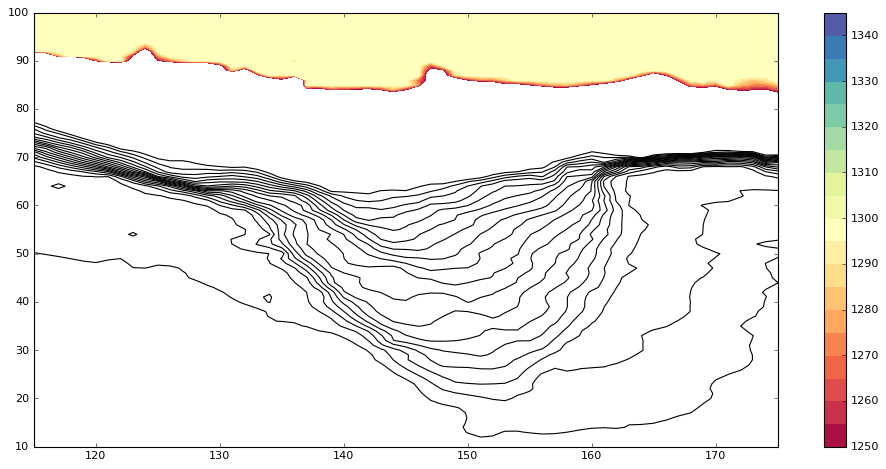

In [6]:
fig, ax = plt.subplots(1,1,figsize=(15, 7))
p = ax.contourf(parent_orig, cmap=cm.Spectral, levels = np.arange(1250, 1350, 5))
c = ax.contour(parent_orig, levels = np.arange(40, 400, 20), colors='k')
fig.colorbar(p, ax=ax)
ax.set_xlim([115, 175])
ax.set_ylim([10, 100])

# Parent bathymetry after it's fixed: real_bathy_for_agrif_fix

(10, 100)

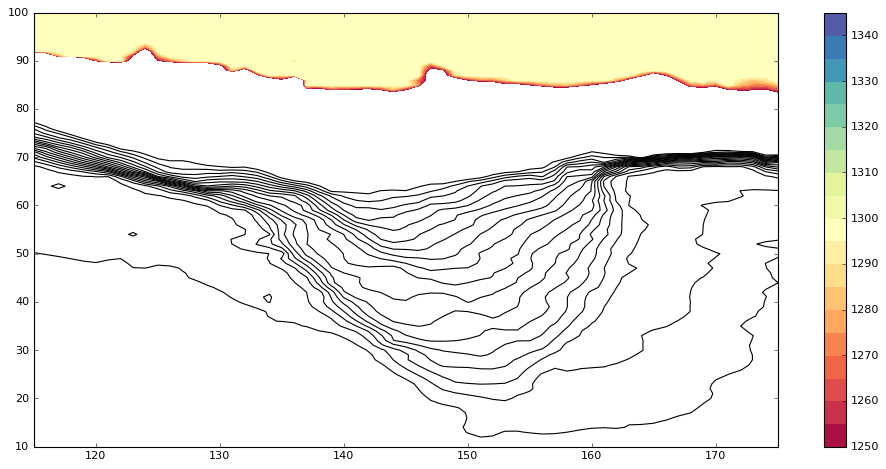

In [5]:
fig, ax = plt.subplots(1,1,figsize=(15, 7))
p = ax.contourf(parent_fix, cmap=cm.Spectral, levels = np.arange(1250, 1350, 5))
c = ax.contour(parent_fix, levels = np.arange(40, 400, 20), colors='k')
fig.colorbar(p, ax=ax)
ax.set_xlim([115, 175])
ax.set_ylim([10, 100])

# Elevation database used as reference for child interpolation: IBCAO_V3_500m_RR_For_Nesting_Tools

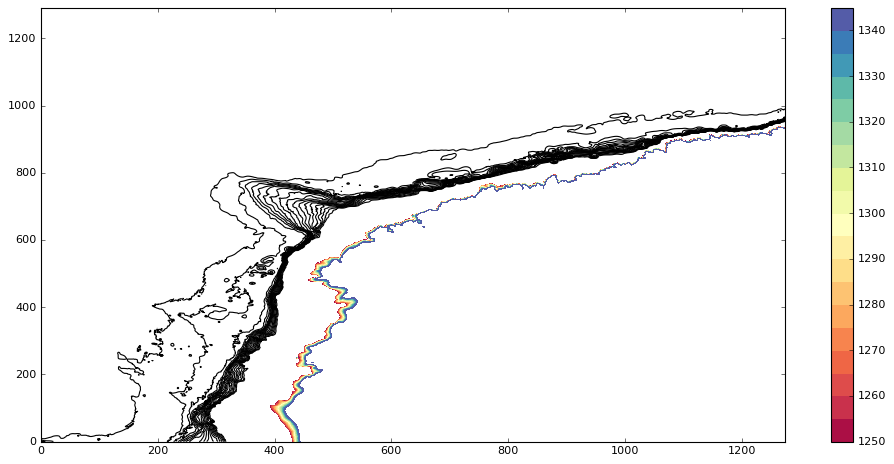

In [10]:
fig, ax = plt.subplots(1,1,figsize=(15, 7))
p = ax.contourf(elevation, cmap=cm.Spectral, levels = np.arange(1250, 1350, 5))
c = ax.contour(elevation, levels = np.arange(40, 400, 20), colors='k')
fig.colorbar(p, ax=ax)

# Child bathymetry from parent and elevation database: 1_real_bathy_for_agrif_fix

(0, 274)

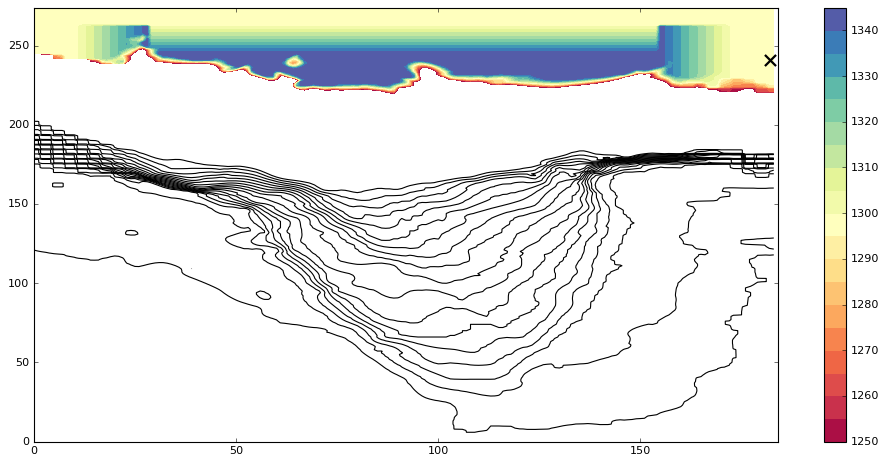

In [4]:
fig, ax = plt.subplots(1,1,figsize=(15, 7))
p = ax.contourf(child, cmap=cm.Spectral, levels = np.arange(1250, 1350, 5))
c = ax.contour(child, levels = np.arange(40, 400, 20), colors='k')
ax.scatter(182, 241, s=100, c='k', marker='x', linewidth=2)
fig.colorbar(p, ax=ax)
ax.set_xlim([0, child.shape[-1]])
ax.set_ylim([0, child.shape[-2]])

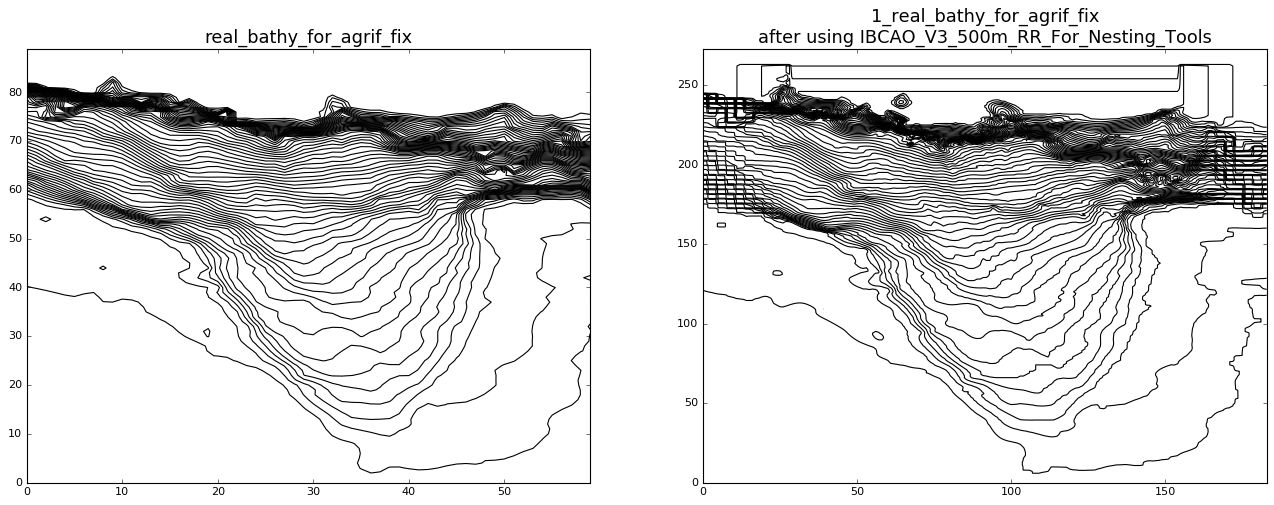

In [29]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 7))
levels = np.arange(40, 1350, 20)
ax1.contour(parent_fix[10:100, 115:175], levels=levels, colors='k')
ax2.contour(child, levels=levels, colors='k')
ax1.set_title('real_bathy_for_agrif_fix', fontsize=16)
ax2.set_title('1_real_bathy_for_agrif_fix\nafter using IBCAO_V3_500m_RR_For_Nesting_Tools', fontsize=16)

# How would 1_real_bathy_for_agrif_fix if we didn't use an elevation database?

    <                 8  ocean grid points suppressed
    ---
    >                 7  ocean grid points suppressed
    1530c1530
    <   ==>> time-step=            1  abs(U) max:   1.400076883992016E+065
    ---
    >   ==>> time-step=            1  abs(U) max:   1.400076883992015E+065
    1537c1537
    <  kt=     1 max abs(U):  1.4001E+65, i j k:   182  241   43
    ---
    >  kt=     1 max abs(U):  1.4001E+65, i j k:   182  241   49